# 1_Univariate_investment_risk_and_returns
## Financial returns


Types of returns: 

1. Discrete returns: are most commonly used, and represent periodic (Daily, weekly, monthly) price movements: 

```
Rt2 = (Pt2- pt1)/pt1
```
2. Log returns: are often used in academic research and financial modeling. They assume continuous compounding. 

```
Rt2 = ln(Pt2)- ln(Pt1)
```

### Financial timeseries data
In finance, it is common to be working with a CSV (comma-separated-values) "flat" file of a timeseries of many different assets with their prices, returns, or other data over time. Sometimes the data is stored in databases, but more often than not, even large banks still use spreadsheets.

In this exercise, you have been given a timeseries of trading data for Microsoft stock as a .csv file stored at the url fpath_csv. When you finish the exercise, take note of the various types of data stored in each column.

You will be using pandas to read in the CSV data as a DataFrame.

In [3]:
import os

while 'DATABASE' not in os.listdir():
    
    os.chdir('..')

In [17]:
import pandas as pd

stockprices = pd.read_csv('https://assets.datacamp.com/production/repositories/1546/datasets/0f1a004a8aa693163fa55f277513309f710b700d/MSFTPrices.csv', parse_dates = ['Date'])

stockprices = pd.DataFrame(stockprices)
stockprices


,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.281250,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.312500,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.906250,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.000000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.718750,62013600,36.833828
...,...,...,...,...,...,...,...
4556,2018-02-12,89.157,90.202,88.343,89.129997,35720300,88.713272
4557,2018-02-13,89.348,90.423,88.212,89.830002,26407700,89.410004
4558,2018-02-14,88.510,90.990,88.410,90.809998,34960900,90.809998
4559,2018-02-15,91.210,92.720,90.620,92.660004,27823900,92.660004


In [18]:
# Calculate the daily returns of the adjusted close price
stockprices['Returns'] = stockprices['Adjusted'].pct_change()
stockprices

,Date,Open,High,Low,Close,Volume,Adjusted,Returns
0,2000-01-03,88.777,89.722,84.712,58.281250,53228400,38.527809,NaN
1,2000-01-04,85.893,88.588,84.901,56.312500,54119000,37.226345,-0.033780
2,2000-01-05,84.050,88.021,82.726,56.906250,64059600,37.618851,0.010544
3,2000-01-06,84.853,86.130,81.970,55.000000,54976600,36.358688,-0.033498
4,2000-01-07,82.159,84.901,81.166,55.718750,62013600,36.833828,0.013068
...,...,...,...,...,...,...,...,...
4556,2018-02-12,89.157,90.202,88.343,89.129997,35720300,88.713272,0.010773
4557,2018-02-13,89.348,90.423,88.212,89.830002,26407700,89.410004,0.007854
4558,2018-02-14,88.510,90.990,88.410,90.809998,34960900,90.809998,0.015658
4559,2018-02-15,91.210,92.720,90.620,92.660004,27823900,92.660004,0.020372


In [19]:
# Calculate the daily returns of the adjusted close price
stockprices['Returns'] = stockprices['Adjusted'].pct_change()

# Check the first five rows of StockPrices
print(stockprices.head())


        Date    Open    High     Low     Close    Volume   Adjusted   Returns
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809       NaN
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345 -0.033780
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851  0.010544
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688 -0.033498
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828  0.013068


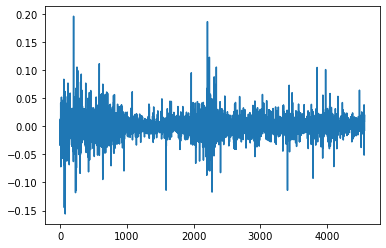

In [21]:

import matplotlib.pyplot as plt


# Plot the returns column over time
stockprices['Returns'].plot()
plt.show()

### Return distributions
In order to analyze the probability of outliers in returns, it is helpful to visualize the historical returns of a stock using a histogram.

You can use the histogram to show the historical density or frequency of a given range of returns. Note the outliers on the left tail of the return distribution are what you often want to avoid, as they represent large negative daily returns. Outliers on the right hand side of the distribution are normally particularly good events for the stock such as a positive earnings surprise.

StockPrices from the previous exercise is available in your workspace, and matplotlib.pyplot is imported as plt.

In [22]:

StockPrices = stockprices
# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']*100

In [23]:
# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']*100

# Drop the missing values
returns_plot = percent_return.dropna()


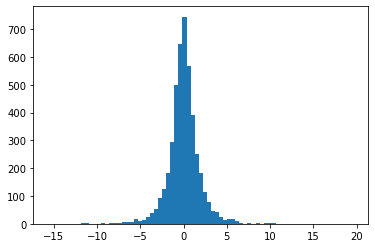

In [24]:
# Plot the returns histogram
plt.hist(returns_plot, bins=75)
plt.show()

**Notice the shape of the plot? What kind of distribution do you think this is?**


## Mean, variance, and normal distribution


1. Skewness o la asimetría es una medida de la 'inclinacion' de una distribución: 

2. Kurtosis: es una mdedida del grosor de las colas de una distribución 

Hay muchas distribuciones pero una tipica es la Distribución normal que tiene las siguientes propiedades: 

1. media
2. varianza
3. skewness: 0
4. kurtosis: 3


Luego está la distribución normal estandar donde: 
1. Media = 0
2. Desviación estandar: 1


Sin embargo, las finanzas **no suelen tirar a una distribuciñón normal** y ** pueden tener una kurtosis alta**

### First moment: Mu
You can calculate the average historical return of a stock by using numpy's mean() function.

When you are calculating the average daily return of a stock, you are essentially estimating the first moment (  ) of the historical returns distribution.

But what use are daily return estimates to a long-term investor? You can use the formula below to estimate the average annual return of a stock given the average daily return and the number of trading days in a year (typically there are roughly 252 trading days in a year):

```

Average ANnualized Return = ((1 + ñu ) ^ 252 ) -1

```

In [25]:
# Import numpy as np
import numpy as np

# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
print(mean_return_daily)

0.0003777754643575769


In [26]:
# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
print(mean_return_annualized)

0.09985839482852632


**The average daily return of the stock (mu) is 0.04% per day. This works out to an annualized return of 9.99% per year.**


### Second moment: Variance
Just like you estimated the first moment of the returns distribution in the last exercise, you can can also estimate the second moment, or variance of a return distribution using numpy.

In this case, you will first need to calculate the daily standard deviation (  ), or volatility of the returns using np.std(). The variance is simply .

StockPrices from the previous exercise is available in your workspace, and numpy is imported as np.

In [27]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
print(sigma_daily)


0.019341100408708328


In [28]:
# Calculate the daily variance
variance_daily = sigma_daily**2
print(variance_daily)

0.0003740781650197374


**The average daily volatility of the stock (sigma) is 1.93% per day. The average daily variance of the stock (the second moment) is 0.04%.**

### Annualizing variance
You can't annualize the variance in the same way that you annualized the mean.

In this case, you will need to multiply  by the square root of the number of trading days in a year. There are typically 252 trading days in a calendar year. Let's assume this is the case for this exercise.

This will get you the annualized volatility, but to get annualized variance, you'll need to square the annualized volatility just like you did for the daily calculation.

sigma_daily from the previous exercise is available in your workspace, and numpy is imported as np.

In [29]:
# Annualize the standard deviation
sigma_annualized = sigma_daily*np.sqrt(252)
print(sigma_annualized)

0.3070304505826317


In [30]:
# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print(variance_annualized)

0.09426769758497383


**This works out to an annualized volatility (sigma) of 30.7% per year. And an annualized variance of 9.43% per year**

## Skewness and kurtosis

En cuanto a la kurtosis, por defecto python ya calcula el excess kurtosis, por lo que para calcular la kurtosis normal habra que sumarle `+3` al resultado. 

En finanzas una kurtosis alta es sinónimo de un gran riesgo asociado. 

Si: 

1. Kurtosis > 3
2. Skewness != 0

Lo más probable es que los datos **no sean normales**. Si se acercan a esos valores críticos, para hacer la prueba de fuego, se puede usar el test de **Shapiro-wilk**, donde se vera si los datos están normal distribuídos: 

```
Shapiro-wilk H0: Los datos están normal distribuidos
```
En código. 

```
from scipy import stats
p_value = stats.shapiro(StockData['Returns'].dropna())[1]

if p_value <= 0.05: 

    print('Null hypothesis of normality is rejected')
  
else: 

    print('Null hypothesis of normality is accepted')



```

### Third moment: Skewness
To calculate the third moment, or skewness of a returns distribution in Python, you can use the skew() function from scipy.stats.

Remember that a negative skew is a right-leaning curve, while positive skew is a left-leaning curve. In finance, you would tend to want positive skewness, as this would mean that the probability of large positive returns is unusually high, and the negative returns are more closely clustered and predictable.

StockPrices from the previous exercise is available in your workspace.

In [32]:
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns = StockPrices['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print(returns_skewness)

0.21935459193067805


**The third moment (skewness) of the stock returns is 0.22. A normal distribution would have a skewness much closer to 0.**

### Fourth moment: Kurtosis
Finally, to calculate the fourth moment of a distribution, you can use the kurtosis() function from scipy.stats.

Note that this function actually returns the excess kurtosis, not the 4th moment itself. In order to calculate kurtosis, simply add 3 to the excess kurtosis returned by kurtosis().

clean_returns from the previous exercise is available in your workspace.

In [33]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
print(excess_kurtosis)

10.314572618025519


In [34]:
# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis + 3
print(fourth_moment)

13.314572618025519


**The fourth moment (kurtosis) of the stock returns is 13.31 with an excess kurtosis of 10.31. A normal distribution would tend to have a kurtosis of 3, and an excess kurtosis of 0.**

### Statistical tests for normality
In order to truly be confident in your judgement of the normality of the stock's return distribution, you will want to use a true statistical test rather than simply examining the kurtosis or skewness.

You can use the shapiro() function from scipy.stats to run a Shapiro-Wilk test of normality on the stock returns. The function will return two values in a list. The first value is the t-stat of the test, and the second value is the p-value. You can use the p-value to make a judgement about the normality of the data. If the p-value is less than or equal to 0.05, you can safely reject the null hypothesis of normality and assume that the data are non-normally distributed.

clean_returns from the previous exercise is available in your workspace.

In [35]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

Shapiro results: ShapiroResult(statistic=0.9003633260726929, pvalue=0.0)


In [36]:
# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

P-value:  0.0


**The p-value is 0, so null hypothesis of normality is rejected. The data are non-normal.**